# BIG MART SALES

## Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the train_dataset

In [3]:
data=pd.read_csv('EDA_BIGMART_SALES.csv',index_col=0)
data.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type_Category,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,249.8092,3735.1380,FOOD,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,141.6180,2097.2700,FOOD,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,182.0950,732.3800,FOOD,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,53.8614,994.7052,Non-Consumable,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [4]:
data.columns

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type_Category', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

### Identifying the numerical & categorical variables in the dataset

In [11]:
num_var = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['int64','float64']]
cat_var = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [12]:
print(num_var)
print(cat_var)

['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year']
['Item_Fat_Content', 'Item_Type_Category', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']


### Data Visualization

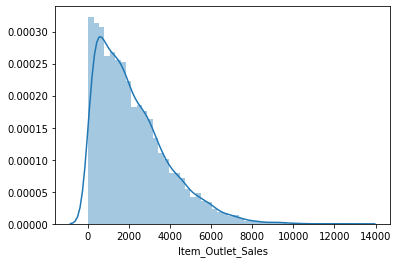

In [4]:
sns.distplot(data.Item_Outlet_Sales)

Inference:
 - 'Item_Outlet_Sales' is the target variable
 - Majority of the sales(amount) have been made within a range of 0 and 2000

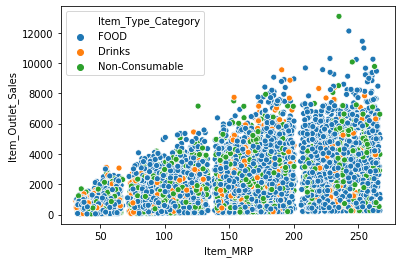

In [14]:
sns.scatterplot(x=data.Item_MRP,y=data.Item_Outlet_Sales,hue=data.Item_Type_Category)

Inference :
  - Items with price >200 are generating more Sales
  - Majorly Food items are being purchased by the customers 

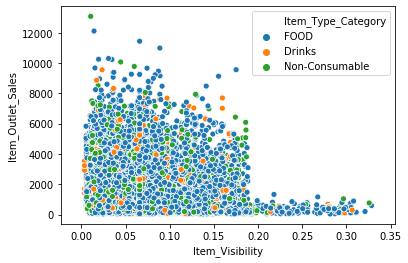

In [15]:
sns.scatterplot(x=data.Item_Visibility,y=data.Item_Outlet_Sales,hue=data.Item_Type_Category)

Inference :
 - Food & Non-consumable products are made easily available to the customers compared to Drinks

<BarContainer object of 8523 artists>

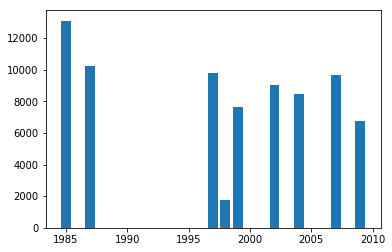

In [6]:
plt.bar(x=data.Outlet_Establishment_Year,height=data.Item_Outlet_Sales)

Inference:
 - Customers tend to purchase more items in the store which has been in the market for longer duration

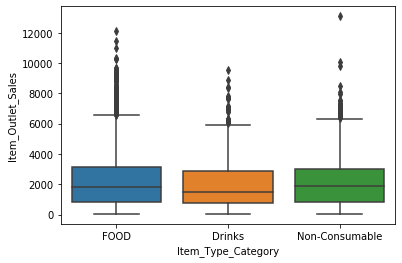

In [6]:
sns.boxplot(x=data.Item_Type_Category,y=data.Item_Outlet_Sales)

Inference:
 - Average sales(value) for different category of items made available are similar

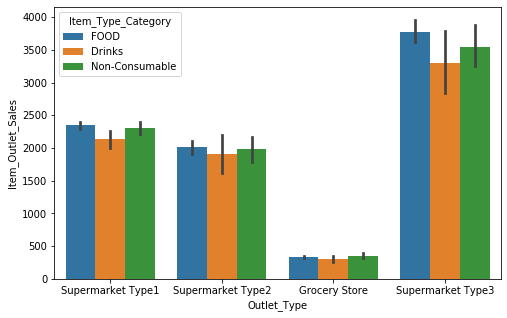

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x="Outlet_Type",data=data,hue='Item_Type_Category',y="Item_Outlet_Sales")
plt.show()

Inference :
 - Supermarket Type3 is generating more revenue in the market.
 - Revenue generated in each store under each category is similar. 

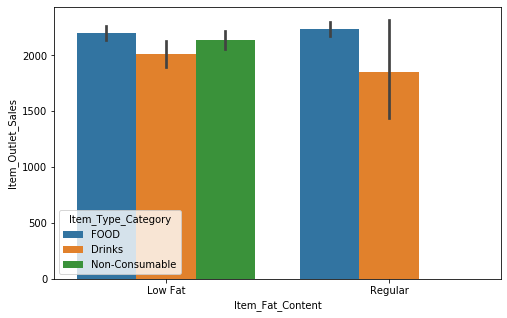

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x="Item_Fat_Content",data=data,hue="Item_Type_Category",y="Item_Outlet_Sales")
plt.show()

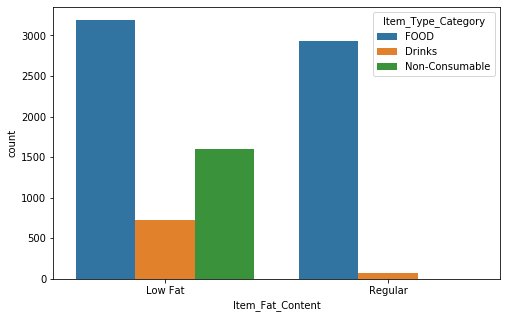

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="Item_Fat_Content",data=data,hue="Item_Type_Category")
plt.show()

([<matplotlib.patches.Wedge at 0x25c6cc0dba8>,
 [Text(-0.4910806225038549, 0.9842966129176847, 'Low Fat'),
  Text(0.4910806225038548, -0.9842966129176849, 'Regular')],
 [Text(-0.2678621577293754, 0.5368890615914643, '64.7%'),
  Text(0.2678621577293753, -0.5368890615914644, '35.3%')])

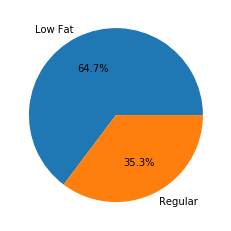

In [40]:
plt.pie(data.Item_Fat_Content.value_counts(),labels=data.Item_Fat_Content.unique(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x25c72648748>,
 [Text(-0.697548518359347, 0.8505445693993231, 'FOOD'),
  Text(0.42062396254953444, -1.0164032084409849, 'Drinks'),
  Text(1.0526380464749026, -0.31930102272542255, 'Non-Consumable')],
 [Text(-0.3804810100141892, 0.4639334014905398, '71.9%'),
  Text(0.22943125229974604, -0.554401750058719, '18.8%'),
  Text(0.5741662071681286, -0.1741641942138668, '9.4%')])

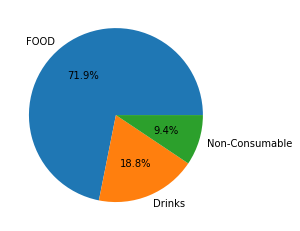

In [41]:
plt.pie(data.Item_Type_Category.value_counts(),labels=data.Item_Type_Category.unique(),autopct='%1.1f%%')

Inference:
 - Majorly food items are being purchased by the customers

([<matplotlib.patches.Wedge at 0x25c72626f98>,
 [Text(0.36266446547093334, 1.03849626166139, 'Tier 1'),
  Text(-1.0315659207596939, -0.3819316053002228, 'Tier 3'),
  Text(0.7006790317242327, -0.8479675079282176, 'Tier 2')],
 [Text(0.1978169811659636, 0.5664525063607582, '39.3%'),
  Text(-0.5626723204143784, -0.20832633016375787, '32.7%'),
  Text(0.38218856275867236, -0.4625277315972095, '28.0%')])

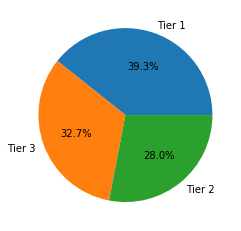

In [42]:
plt.pie(data.Outlet_Location_Type.value_counts(),labels=data.Outlet_Location_Type.unique(),autopct='%1.1f%%')

Inference:
 - Customers from Tier1 locations tend to make frequent purchases compared to the other cities